In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [2]:

# import the new data with the sentiments
df = pd.read_csv('final_df.csv')
df = df[['close', 'sentiment']]
df

,close,sentiment
0,290.91,0.112602
1,299.10,0.112449
2,323.29,0.110693
3,309.80,0.076931
4,315.74,-0.198597
...,...,...
1358,3479.53,0.199551
1359,3910.26,0.170005
1360,3923.95,0.110743
1361,3945.88,0.116676


In [3]:
# import the google trends
g_df = pd.read_csv('gtrends_interpolated.csv')
g_df

,Unnamed: 0,Date,trends
0,4,2017-08-17,14.428571
1,5,2017-08-18,14.285714
2,6,2017-08-19,14.142857
3,7,2017-08-20,14.000000
4,8,2017-08-21,14.285714
...,...,...,...
1359,1363,2021-05-07,98.285714
1360,1364,2021-05-08,99.142857
1361,1365,2021-05-09,100.000000
1362,1366,2021-05-10,97.000000


In [4]:
trends = list(g_df['trends'])
trends

[14.428571428571429,
 14.285714285714286,
 14.142857142857142,
 14.0,
 14.285714285714286,
 14.571428571428571,
 14.857142857142858,
 15.142857142857142,
 15.428571428571429,
 15.714285714285714,
 16.0,
 15.857142857142858,
 15.714285714285714,
 15.571428571428571,
 15.428571428571429,
 15.285714285714286,
 15.142857142857142,
 15.0,
 14.714285714285714,
 14.428571428571429,
 14.142857142857142,
 13.857142857142858,
 13.571428571428571,
 13.285714285714286,
 13.0,
 12.714285714285714,
 12.428571428571429,
 12.142857142857142,
 11.857142857142858,
 11.571428571428571,
 11.285714285714286,
 11.0,
 10.714285714285714,
 10.428571428571429,
 10.142857142857142,
 9.857142857142858,
 9.571428571428571,
 9.285714285714286,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.0,
 9.428571428571429,
 9.857142857142858,
 10.285714285714285,
 10.714285714285714,
 11.142857142857142,
 11.571428571428571,
 12.0,
 12.285714285714286,
 12.571428571428571,
 12.857142857142858,
 13.142857142857142,
 13.42857142

In [5]:
len(trends[1:])

1363

In [6]:
# concat listto df
df['trends'] = trends[1:]
df_final = df

## 4.3 Third Iteration
In this iteration we are going to include the goole trends. 

In [7]:
#get the close price only

df_close_3 = df_final[['close', 'sentiment', 'trends']]

# create a variable to predict x days in the future
future_days = 25
# create a new column (target) shifted 'x' days up
df_close_3['prediction']= df_close_3[['close']].shift(-future_days)
df_close_3.tail()

,close,sentiment,trends,prediction
1358,3479.53,0.199551,98.285714,NaN
1359,3910.26,0.170005,99.142857,NaN
1360,3923.95,0.110743,100.000000,NaN
1361,3945.88,0.116676,97.000000,NaN
1362,4173.45,0.096680,94.000000,NaN


In [8]:
# Create the feature data set (X) and convert it in a numpy dataset and remove the last rows days (last 25 in this case)
X = np.array(df_close_3.drop(['prediction'], 1))[:-future_days]
print(X)

# Create the target data set (y) and convet it as well in array
y = np.array(df_close_3['prediction'])[:-future_days]
y

[[2.90910000e+02 1.12602299e-01 1.42857143e+01]
 [2.99100000e+02 1.12448810e-01 1.41428571e+01]
 [3.23290000e+02 1.10692593e-01 1.40000000e+01]
 ...
 [2.43260000e+03 1.09977941e-01 4.98571429e+01]
 [2.51404000e+03 1.81536458e-01 5.01428571e+01]
 [2.42267000e+03 1.49318947e-01 5.04285714e+01]]


array([ 276.91,  215.21,  253.  , ..., 3923.95, 3945.88, 4173.45])

In [9]:
# Split the data into 75% train and 25% test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [10]:
# Create the models
# Create the decision tree first
#train for the new feature

tree = DecisionTreeRegressor().fit(x_train, y_train)

In [11]:
#Get the last x rows of the feature data set

x_future_3 = df_close_3.drop(['prediction'], 1)[:-future_days]

# now getting the last 25 rows

x_future_3 = x_future_3.tail(future_days)

# turn it into an array

x_future_3 = np.array(x_future_3)

print(x_future_3)

[[1.66808000e+03 1.06469767e-01 3.32857143e+01]
 [1.58184000e+03 1.24147368e-01 3.44285714e+01]
 [1.58574000e+03 1.34195294e-01 3.55714286e+01]
 [1.69884000e+03 2.11070492e-01 3.67142857e+01]
 [1.71263000e+03 1.73184848e-01 3.78571429e+01]
 [1.68701000e+03 2.20294937e-01 3.90000000e+01]
 [1.81674000e+03 1.36830769e-01 3.88571429e+01]
 [1.84046000e+03 9.27494624e-02 3.87142857e+01]
 [1.91937000e+03 4.29409091e-02 3.85714286e+01]
 [1.96805000e+03 1.75950000e-01 3.84285714e+01]
 [2.13369000e+03 1.90281818e-01 3.82857143e+01]
 [2.00852000e+03 1.11379762e-01 3.81428571e+01]
 [2.07569000e+03 1.32077273e-01 3.80000000e+01]
 [2.10738000e+03 1.07714103e-01 3.95714286e+01]
 [2.11221000e+03 2.12071831e-01 4.11428571e+01]
 [1.96347000e+03 1.29991398e-01 4.27142857e+01]
 [2.08046000e+03 1.89592857e-01 4.42857143e+01]
 [2.06687000e+03 1.88770707e-01 4.58571429e+01]
 [2.13349000e+03 2.47921053e-01 4.74285714e+01]
 [2.15136000e+03 1.06394253e-01 4.90000000e+01]
 [2.13769000e+03 1.10201099e-01 4.928571

In [12]:
# Show the modeltree prediction with sentiment
tree_prediction_3 = tree.predict(x_future_3)
print(tree_prediction_3)
print()

[2317.6  2161.12 2161.12 2330.03 2330.03 1968.05 2367.39 2320.49 2320.49
 2532.6  2532.6  2748.24 2748.24 2772.42 2532.6  2949.56 3431.04 3239.01
 3524.26 3479.53 3479.53 4173.45 3923.95 3945.88 4173.45]



In [13]:
# Visualise the data
prediction_3 = tree_prediction_3

valid_3 = df_close_3[X.shape[0]:]
valid_3['prediction_3'] = prediction_3
del valid_3['prediction']
valid_3

<ipython-input-13-1dbca0bf3d75>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_3['prediction_3'] = prediction_3


,close,sentiment,trends,prediction_3
1338,2317.60,0.158185,50.714286,2317.60
1339,2235.64,0.185272,51.000000,2161.12
1340,2161.12,0.202618,50.857143,2161.12
1341,2330.03,0.183788,50.714286,2330.03
1342,2357.06,0.168977,50.571429,2330.03
1343,2397.94,0.158827,50.428571,1968.05
1344,2367.39,0.168395,50.285714,2367.39
1345,2213.35,0.101177,50.142857,2320.49
1346,2320.49,0.162125,50.000000,2320.49
1347,2532.60,0.143518,56.285714,2532.60


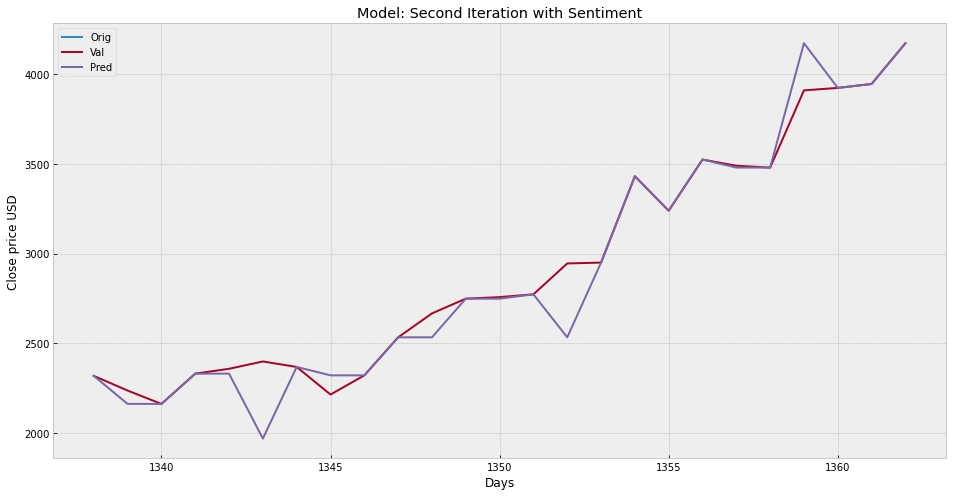

In [15]:
# plot the new prediction
# Plot the re
plt.figure(figsize= (16,8))
plt.title('Model: Second Iteration with Sentiment')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df_close_3['close'][1300:0]) # original data
plt.plot(valid_3[['close', 'prediction_3']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [17]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(valid_3['close'], prediction_3)

ValueError: continuous format is not supported

## 4.4 Fourth Iteration
- Now only the Google trends data will be introduced

In [19]:
#get the close price only

df_close_4 = df_final[['close', 'trends']]

# create a variable to predict x days in the future
future_days = 25
# create a new column (target) shifted 'x' days up
df_close_4['prediction']= df_close_4[['close']].shift(-future_days)
df_close_4.tail()

,close,trends,prediction
1358,3479.53,98.285714,NaN
1359,3910.26,99.142857,NaN
1360,3923.95,100.000000,NaN
1361,3945.88,97.000000,NaN
1362,4173.45,94.000000,NaN


In [20]:
# Create the feature data set (X) and convert it in a numpy dataset and remove the last rows days (last 25 in this case)
X = np.array(df_close_4.drop(['prediction'], 1))[:-future_days]
print(X)

# Create the target data set (y) and convet it as well in array
y = np.array(df_close_4['prediction'])[:-future_days]
y

[[ 290.91         14.28571429]
 [ 299.1          14.14285714]
 [ 323.29         14.        ]
 ...
 [2432.6          49.85714286]
 [2514.04         50.14285714]
 [2422.67         50.42857143]]


array([ 276.91,  215.21,  253.  , ..., 3923.95, 3945.88, 4173.45])

In [21]:
# Split the data into 75% train and 25% test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Create the models
# Create the decision tree first
#train for the new feature

tree = DecisionTreeRegressor().fit(x_train, y_train)

#Get the last x rows of the feature data set

x_future_4 = df_close_4.drop(['prediction'], 1)[:-future_days]

# now getting the last 25 rows

x_future_4 = x_future_4.tail(future_days)

# turn it into an array

x_future_4 = np.array(x_future_4)

print(x_future_4)

[[1668.08         33.28571429]
 [1581.84         34.42857143]
 [1585.74         35.57142857]
 [1698.84         36.71428571]
 [1712.63         37.85714286]
 [1687.01         39.        ]
 [1816.74         38.85714286]
 [1840.46         38.71428571]
 [1919.37         38.57142857]
 [1968.05         38.42857143]
 [2133.69         38.28571429]
 [2008.52         38.14285714]
 [2075.69         38.        ]
 [2107.38         39.57142857]
 [2112.21         41.14285714]
 [1963.47         42.71428571]
 [2080.46         44.28571429]
 [2066.87         45.85714286]
 [2133.49         47.42857143]
 [2151.36         49.        ]
 [2137.69         49.28571429]
 [2299.19         49.57142857]
 [2432.6          49.85714286]
 [2514.04         50.14285714]
 [2422.67         50.42857143]]


In [22]:
# Show the modeltree prediction with sentiment
tree_prediction_4 = tree.predict(x_future_4)
print(tree_prediction_4)
print()

[2317.6  2235.64 2235.64 2330.03 2357.06 1919.37 1968.05 2213.35 2320.49
 2532.6  2666.13 2748.24 2666.13 2532.6  2944.77 2949.56 3431.04 3239.01
 3524.26 3479.53 3479.53 3910.26 3923.95 3923.95 4173.45]



In [23]:
# Visualise the data
prediction_4 = tree_prediction_4

valid_4 = df_close_4[X.shape[0]:]
valid_4['prediction_4'] = prediction_4
del valid_4['prediction']
valid_4

<ipython-input-23-4f0bcfa9d5f7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_4['prediction_4'] = prediction_4


,close,trends,prediction_4
1338,2317.60,50.714286,2317.60
1339,2235.64,51.000000,2235.64
1340,2161.12,50.857143,2235.64
1341,2330.03,50.714286,2330.03
1342,2357.06,50.571429,2357.06
1343,2397.94,50.428571,1919.37
1344,2367.39,50.285714,1968.05
1345,2213.35,50.142857,2213.35
1346,2320.49,50.000000,2320.49
1347,2532.60,56.285714,2532.60


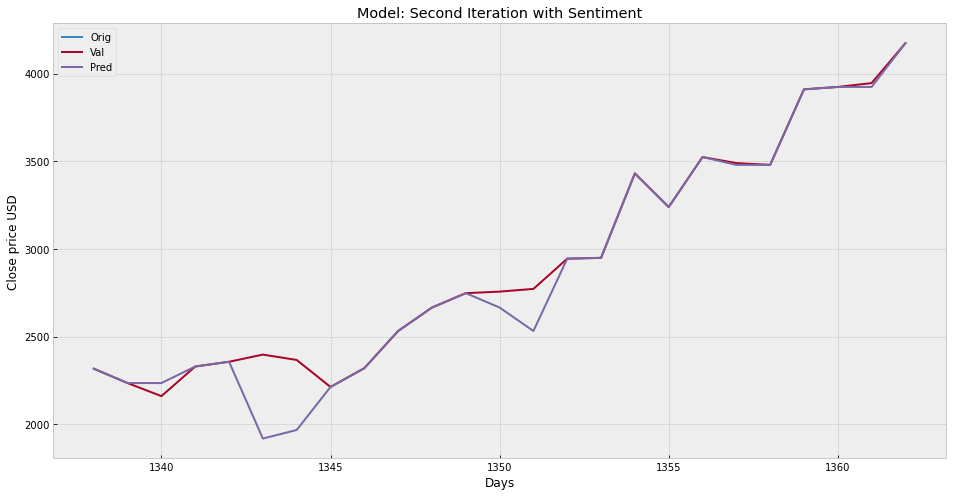

In [24]:
# plot the new prediction
# Plot the re
plt.figure(figsize= (16,8))
plt.title('Model: Second Iteration with Sentiment')
plt.xlabel('Days')
plt.ylabel('Close price USD')
plt.plot(df_close_4['close'][1300:0]) # original data
plt.plot(valid_4[['close', 'prediction_4']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()